In [1]:
import torch
import numpy as np  
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
T = torch.tensor(np.arange(0,100).reshape(10,10))
T_trans = T.t()
print(id(T.storage())==id(T_trans.storage()))

False


C:\Users\joshu\AppData\Local\Temp\ipykernel_15376\803392552.py:3: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(id(T.storage())==id(T_trans.storage()))


In [3]:
T_neu = T[1:,1:]
print(f"stride of tensor: {T_neu.stride()}")
print(f"size of tensor: {T_neu.size()}")
print(f"offset of tensor: {T_neu.storage_offset()}")


stride of tensor: (10, 1)
size of tensor: torch.Size([9, 9])
offset of tensor: 11


In [4]:
T_fr = torch.randn(10,10)
print(f"determine if random tensor is a matrix of full rank: Det(matrix) = {np.linalg.det(T_fr)}")
I = torch.matmul(T_fr, torch.inverse(T_fr))
print()
print(f"tensor * tensor^(-1) = {np.round(I)}")
print()
print(f"determine if tensor multiplication equals to the identity matrix: {np.all(np.array(np.round(I) == torch.tensor(np.identity(10))))}")

determine if random tensor is a matrix of full rank: Det(matrix) = 4052.13037109375

tensor * tensor^(-1) = tensor([[1., -0., 0., -0., -0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., -0., 0., 0., 0., -0., 0.],
        [-0., -0., 1., 0., 0., -0., 0., -0., 0., 0.],
        [0., -0., 0., 1., 0., 0., -0., 0., -0., -0.],
        [0., -0., 0., 0., 1., 0., -0., -0., 0., -0.],
        [0., 0., -0., -0., -0., 1., -0., 0., -0., -0.],
        [0., 0., 0., -0., -0., 0., 1., -0., -0., -0.],
        [-0., 0., -0., 0., -0., -0., 0., 1., -0., 0.],
        [0., 0., -0., -0., -0., 0., -0., 0., 1., -0.],
        [-0., 0., -0., -0., 0., -0., 0., -0., 0., 1.]])

determine if tensor multiplication equals to the identity matrix: True


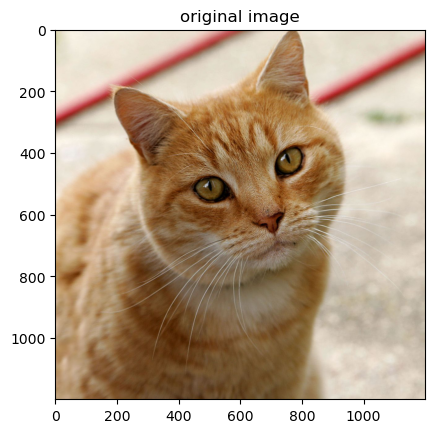

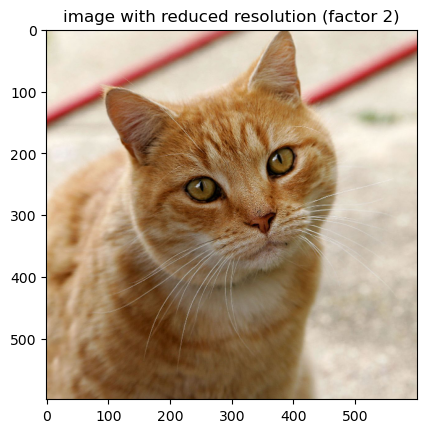

In [5]:
img = Image.open("data/cat1.jpg")
preprocess = transforms.ToTensor()

img_t = preprocess(img).permute(1,2,0)
plt.figure
plt.imshow(img)
plt.title("original image")
plt.show()

shape = np.array(img_t.shape)
shape = ((shape[0]/2).astype(int), (shape[1]/2).astype(int), (shape[2]).astype(int))

img_t_cut = torch.as_strided(img_t,shape,(img_t.stride(0)*2, img_t.stride(1)*2, img_t.stride(2)))
plt.figure
plt.imshow(np.array(img_t_cut))
plt.title("image with reduced resolution (factor 2)")
plt.show()